# Face Verification
**GitHub:** https://github.com/pirsquareff/fisherface

For the rest of the homework we will work on face verification (Given a face, say whether it is person A or not). Face verification is quite related to face recog- nition (Given a face, say who it is). Face verification is a binary classification task, while face recognition is a multi-class problem.

Download the file facedata.mat from Mycourseville and import it

In [92]:
import numpy as np
from IPython.display import Latex
from IPython.display import Math
from IPython.display import display
import matplotlib.pyplot as plt
import copy

In [93]:
import scipy.io
data = scipy.io.loadmat("data/facedata.mat")

`data` is a dictionary with key value pairs. The data you want to use can be accessed by using `facedata` as the key.

(40, 10)
[[48 46 50 ..., 50 54 53]
 [47 47 48 ..., 37 46 50]
 [46 48 43 ..., 33 41 51]
 ..., 
 [49 49 50 ..., 45 46 47]
 [48 48 49 ..., 45 46 46]
 [51 48 50 ..., 45 45 46]]
(56, 46)


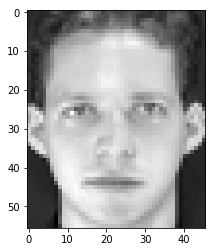

In [101]:
# face data is a 2-dimensional array with size 40x10
print(data["facedata"].shape)
# Each data is indexed by i and j
# where i is the person index
# j is the index of the pose
# In other words, there are 40 people in the database.
# There are 10 images per person.
n_person = data["facedata"].shape[0]
n_image_per_person = data["facedata"].shape[1]
print(data["facedata"][0, 0])

# Each image is a 56 by 46 image
image_resolution = np.array([56, 46])
print(data["facedata"][0, 0].shape)

# You can see the image by using the imshow in matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(data["facedata"][0, 0], cmap = "gray")
plt.show()

## Working with images
Each pixel in an image is usually represented by a 8-bit unsigned integer (values from 0 to 255). In order to easily work on images, we usually convert them to floats or doubles using the following command.

`xf[0, 0] = img_as_float(data["facedata"][0, 0])`

In [95]:
from skimage import img_as_float
xf = {}
for i in range(n_person):
    for j in range(n_image_per_person):
        xf[i, j] = img_as_float(data["facedata"][i, j])

`img_as_float` scales 0-255 to 0-1. You can still show the image using the same `imshow` command.

Note that the index of a 2D image starts from the upper left corner of the image. The first dimension goes downwards, while the second dimension goes to the right (think of it as a matrix). To understand what this means, try the following code.

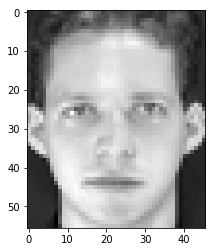

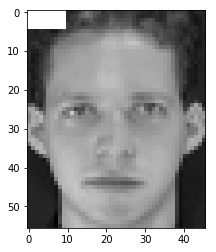

In [96]:
plt.imshow(xf[0, 0], cmap = "gray")
plt.show()
x_temp = copy.deepcopy(xf[0, 0])
x_temp[0:5, 0:10] = 1
# In float format, 1 is white
plt.imshow(x_temp, cmap = "gray")
plt.show()

## The similarity matrix
Consider a set of $N$ data points, a similarity matrix $S$ is a matrix where $S_{i,j}$ is the distance between the $i^{th}$ and the $j^{th}$ data point. A similarity matrix can be very useful for analyzing the data and its distribution. Since a similarity matrix can also be considered as an image, you can also show it as an image to see the pattern in the data.

But how do we define similarity? How can we quantify whether image $A$ is closer to $B$ than image $C$? One way is to treat each pixel in image as an element in a vector (you may find the function `numpy.reshape()` useful). Then, compare the two vectors using Euclidean distance.

Euclidean distance between vector $x$ and $y$ is defined as:
$$Euclidean\_distance =  \sqrt{Σ_{d}(x_{d} − y_{d})^{2}}$$
where $d$ refers to the index of the dimension.

**What is the Euclidean distance between `xf[0,0]` and `xf[0,1]`?**
<font color=red>**Answer**</font><br>
> 10.0376162942

In [114]:
def euclidean_distance(x, y):
    _x = np.reshape(x, np.prod(x.shape))
    _y = np.reshape(y, np.prod(y.shape))
    return np.sqrt(np.sum((_x - _y) ** 2))

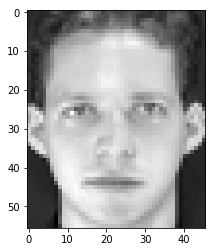

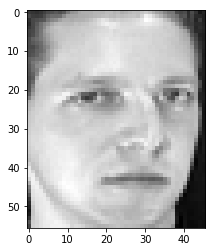

<IPython.core.display.Math object>

In [121]:
plt.imshow(xf[0, 0], cmap = "gray")
plt.show()

plt.imshow(xf[0, 1], cmap = "gray")
plt.show()

display(Math(r"Euclidean\ distance\ between\ xf[0,0]\ and\ xf[0,1]: " + str(euclidean_distance(xf[0, 0], xf[0, 1]))))

**What is the Euclidean distance between `xf[0,0]` and `xf[1,0]`?**
<font color=red>**Answer**</font><br>
> 8.17329509974

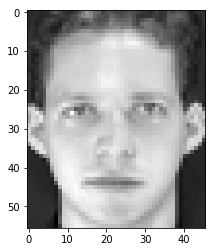

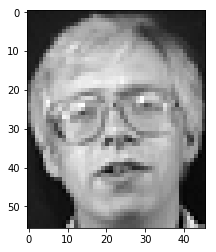

<IPython.core.display.Math object>

In [120]:
plt.imshow(xf[0, 0], cmap = "gray")
plt.show()

plt.imshow(xf[1, 0], cmap = "gray")
plt.show()

display(Math(r"Euclidean\ distance\ between\ xf[0,0]\ and\ xf[1,0]: " + str(euclidean_distance(xf[0, 0], xf[1, 0]))))

**Does the numbers make sense? Do you think these numbers will be useful for face verification?**
<font color=red>**Answer**</font><br>
> Based on the example above, these numbers make sense and seem to be useful for verifying faces, but using only Euclidean distance might not be able to achieve high accuracy.

As we continue our exercise, we will refine our feature vectors so that the Euclidean distance between two images can be used in a face verification system. We define the similarity matrix, $A$, as a matrix whose elements $A_{i, j}$ is the Euclidean distance between data sample $i$ from list $T$ and data sample $j$ from
list $D$, where list $T$, $D$ are lists of data samples.

In [154]:
def similarity_matrix(M, N):
    return [[euclidean_distance(N[j], M[i]) for j in range(len(N))] for i in range(len(M))]

The picture below shows an example similarity matrix calculated by the first 5 images from the first 5 people (for both $T$ and $D$).

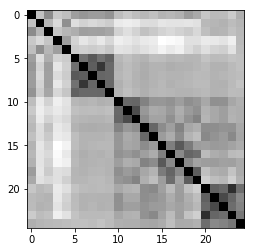

In [155]:
T_sample = []
for i in range(n_person):
    for j in range(n_image_per_person):
        if(i < 5 and j < 5):
            # training image
            T_sample.append(xf[i, j])
A_sample = similarity_matrix(T_sample, T_sample)
A_sample_f = img_as_float(A_sample)
plt.imshow(A_sample_f, cmap = "gray")
plt.show()

**Write a function that takes in a set of feature vectors $T$ and a set of feature vectors $D$, and then output the similarity matrix $A$. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people
for list $T$ (in order `x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ..., x[39, 2]`). Use the feature vectors from the remaining 7 images from all 40 people for list $D$ (in order `x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]`). We will treat $T$ as our training images and $D$ as our testing images**
<font color=red>**Answer**</font><br>

In [156]:
T = []
D = []
for i in range(n_person):
    for j in range(n_image_per_person):
        if(j < 3):
            # training image
            T.append(xf[i, j])
        else:
            # testing image
            D.append(xf[i, j])

In [157]:
A = similarity_matrix(T, D)

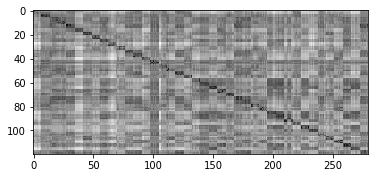

In [158]:
A_f = img_as_float(A)
plt.imshow(A_f, cmap = "gray")
plt.show()